# Projekt 2

# Analiza zbioru danych <u>Online Shoppers Purchasing Intention</u>
# Karol Degórski, Piotr Marciniak i Paweł Niewiadowski

### Import potrzebnych pakietów

In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = None

from matplotlib import pyplot as plt
import seaborn as sns

### Wczytanie danych dotyczących zakupów online

In [2]:
online_shoppers_df = pd.read_csv('online_shoppers_intention.csv')
online_shoppers_df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


* Jest 12330 rekordów, to całkiem sporo
* Jest 18 różnych cech (10 liczbowych i 8 kategorycznych)
* Mamy problem klasteryzacji. Można go traktować jako problem klasyfikacji (zmienna Revenue może być używana jako zmienna celu), jednak w niniejszym projekcie będziemy rozwiązywali problem klasteryzacji

The dataset was formed so that each session 
would belong to a different user in a 1-year period to avoid 
any tendency to a specific campaign, special day, user 
profile, or period.

In [3]:
online_shoppers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

* Nie ma żadnych braków danych

In [4]:
online_shoppers_df.duplicated().value_counts()

False    12205
True       125
dtype: int64

In [5]:
n_duplicates = 125/12205 * 100
print(f'{n_duplicates:.2f}' + "%")

1.02%


In [6]:
online_shoppers_df[online_shoppers_df.duplicated()].head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
158,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,False
159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
178,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
418,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,1,1,1,1,Returning_Visitor,True,False
456,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,2,2,4,1,Returning_Visitor,False,False
483,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,3,2,3,1,Returning_Visitor,False,False
512,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,2,2,1,1,Returning_Visitor,False,False
540,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,3,2,3,1,Returning_Visitor,False,False
554,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,2,2,1,1,Returning_Visitor,False,False
589,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,2,2,1,1,Returning_Visitor,False,False


Mamy 125 zduplikowanych rekordów. Jednakże w tym zadaniu ich występowanie nie budzi znaczących zmartwień. Zwłaszcza, że jest ich około 1%.

### Opis cech w zbiorze danych

| nazwa       | typ    | opis                                                                                                                                          |
|------------|---------|:-----------------------------------------------------------------------------------------------------------------------------------------------------|
| Administrative     | integer  | liczba odwiedzin strony administracyjnej przez użytkownika w danej sesji                                                                 |
| Administrative_Duration        | float  | całkowity spędzony przez użytkownika czas na oglądaniu stron administracyjnych                                                                                                     |
| Informational        | integer | liczba odwiedzin strony informacyjnej przez użytkownika w danej sesji                                                                                                                                           |
| Informational_Duration    | float  | całkowity spędzony przez użytkownika czas na oglądaniu stron informacyjnych                                                                                                                    |
| ProductRelated    | integer  | liczba odwiedzin strony powiązanej z produktem przez użytkownika w danej sesji                                                                                                            |
| ProductRelated_Duration    | float  | całkowity spędzony przez użytkownika czas na oglądaniu stron o produkcie                                                                                |
| BounceRates       | float | procent odwiedzających stronę i ją opuścili, bez wykonania żadnych interakcji z serwerem analizującym daną sesję |
| ExitRates       | float | procent odsłon strony w ostatniej sesji |
| PageValues       | float  | średnia liczba stron odwiedzonych przed wykoanniem tranzakcji e-commerce                                                                                                                      |
| SpecialDay       | float  | cecha reprezentuje, bliskość czasu odwiedzenia strony, do specjalnego dnia np. dnia mamy, walentynek, kiedy to sfinalizowanie tranzakcji jest bardziej prawdopodobne                                                                                                              |
| Month     | object (string)  | miesiąc odwiedzenia strony                                                                                              |
| OperatingSystems   | integer  | system operacyjny użytkownika                                                                                                                 |
| Browser | integer | przeglądarka użytkownika                                         |
| Region  | integer | region z którego użytkownik ogląda stronę                                                     |
| TrafficType   | integer | rodzaj ruchu na stronie                                                                                      |
| VisitorType  | object (string)  | typ odwiedzającego stronę                                                                                     |
| Weekend     | boolean  | informacja czy użytkownik odwiedził stronę w weekend                                                                |
| Revenue       | boolean  | informacja o przychodzie                                                               |

In [7]:
online_shoppers_df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


* Widzimy, że zakresy cech są bardzo szerokie, czyli nasze dane będą wymagały skalowania
* Cechy Informational, Informational_Duration, SpecialDay mają trzeci kwartyl równy 0, co oznacza, że jest bardzo dużo wartości 0

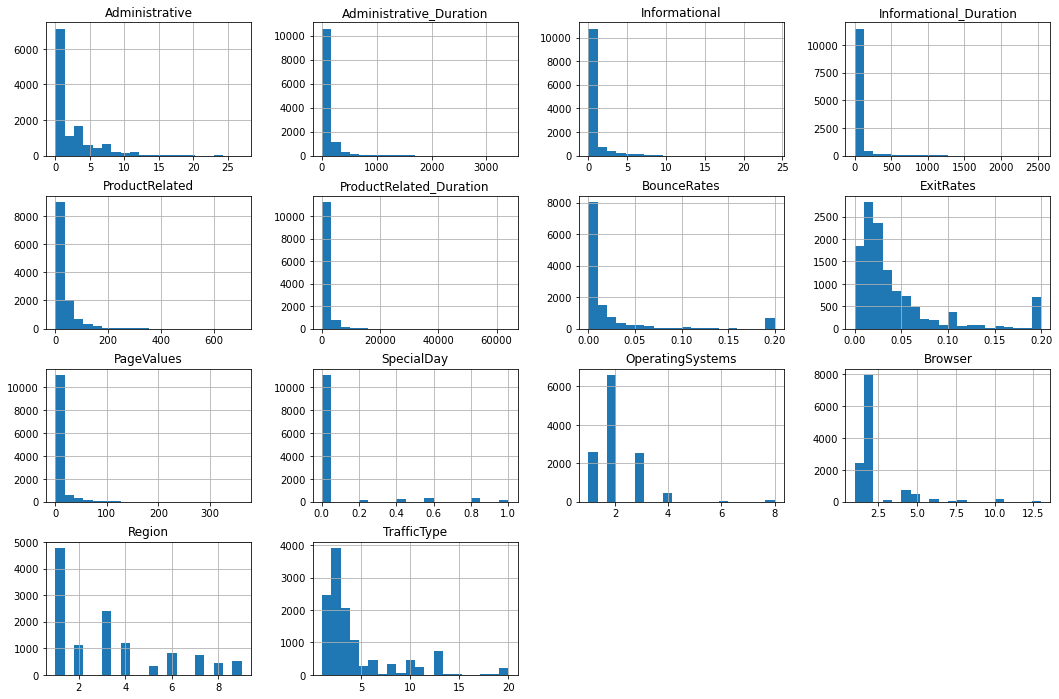

In [8]:
online_shoppers_df.hist(bins = 20, figsize=(18, 12))

plt.show()

* Bardzo dużo zmiennych na rozkłady prawostronnie skośne - dużo wartości bliskich 0 - być może warto transformować te zmienne logarytmicznie
* Dużo zmiennych ma rozkład wykładniczy

## Zmienne kategoryczne

Sprawdźmy jakie są nazwy miesięcy w naszych danych

In [9]:
online_shoppers_df['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

Nie ma w ogóle stycznia ani kwietnia

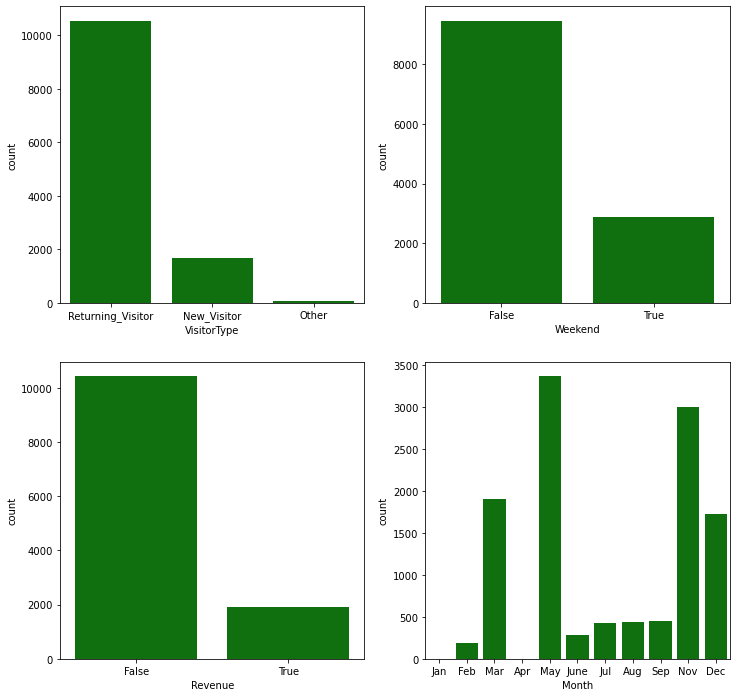

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12), sharex=False, sharey=False)
sns.countplot(data=online_shoppers_df, ax=axes[0][0], x="VisitorType", color='green')
sns.countplot(data=online_shoppers_df, ax=axes[0][1], x="Weekend", color='green')
sns.countplot(data=online_shoppers_df, ax=axes[1][0], x="Revenue", color='green')
sns.countplot(data=online_shoppers_df, ax=axes[1][1], x="Month", 
              order=["Jan", "Feb", "Mar", "Apr", "May", "June","Jul", "Aug", "Sep", "Nov", "Dec"], color='green')
plt.show()

* Dane niezbalansowane dla wszystkich zmiennych kategorycznych,
* Brak danych dla stycznia i kwietnia.

## Zależności między zmiennymi liczbowymi

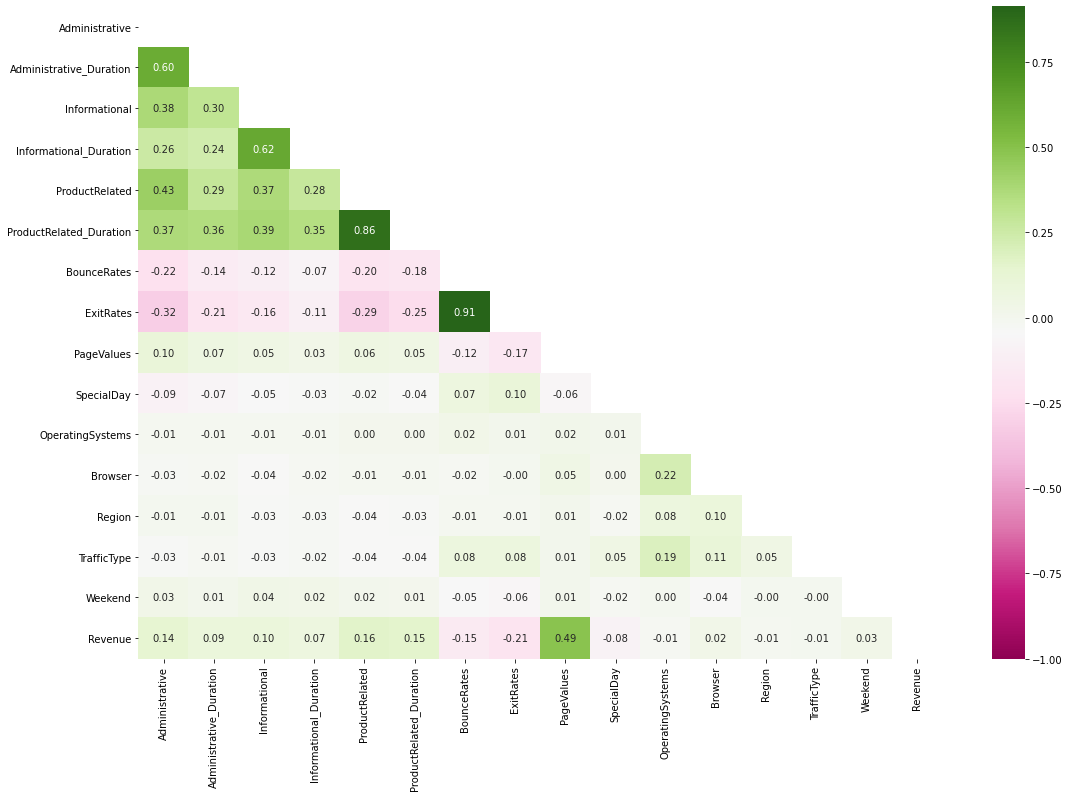

In [11]:
corMatrix = online_shoppers_df.corr()
mask = np.triu(np.ones_like(corMatrix, dtype=bool))

plt.figure(figsize=(18, 12))
sns.heatmap(corMatrix, mask=mask, annot=True, vmin=-1, cmap="PiYG", fmt=".2f")
plt.show()

* Widzimy silną korelację pomiędzy zmiennymi **ExitRates**, a **BounceRates** (nie dziwi nas to, bo jest zależność między procentem odsłon, a procentem odwiedzającymi i opuszczającymi)
* Widzimy również silną zależność między **ProductRelated_Duration** a **ProductRelated** (również nie dziwna korelacja)

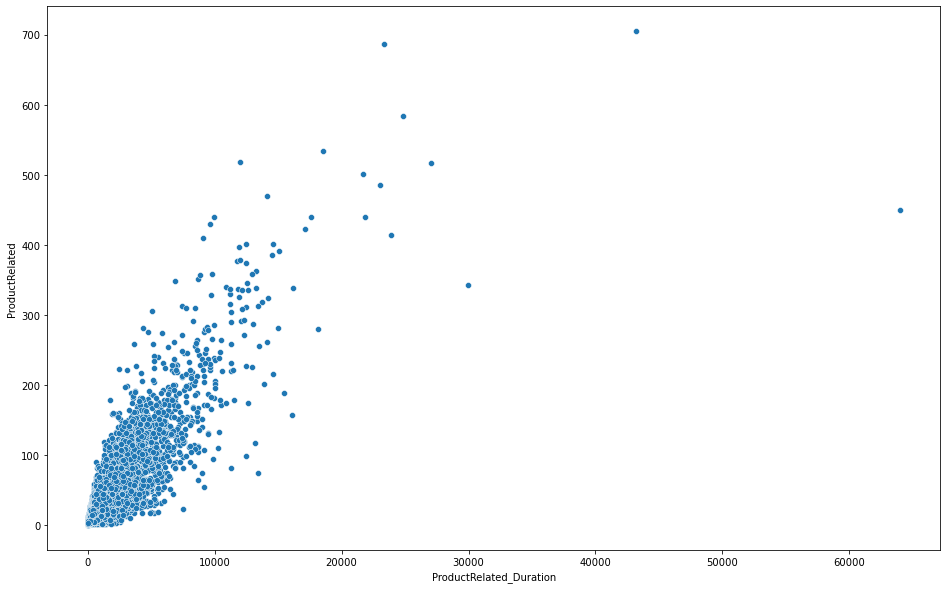

In [12]:
plt.figure(figsize=(16,10))
sns.scatterplot(x="ProductRelated_Duration", y="ProductRelated", 
                data=online_shoppers_df)
plt.show()

Z macierzy korelacji dostajemy $0.91$, ale de facto nie jest to taka liniowa zależność, jaką można by oczekiwać. Dużo próbek jest w prostokącie $[0, 10000] \times [0, 300]$

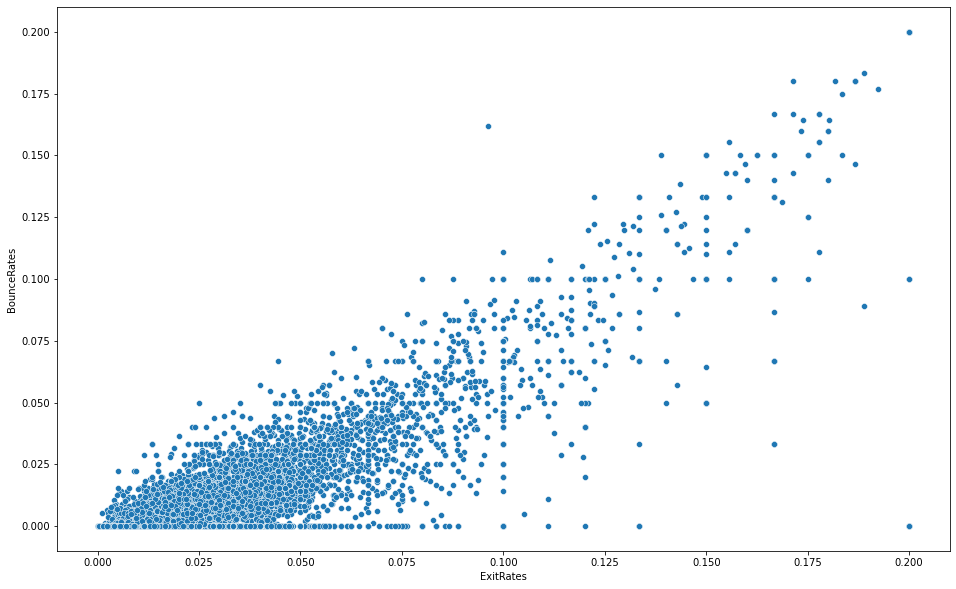

In [13]:
plt.figure(figsize=(16,10))
sns.scatterplot(x="ExitRates", y="BounceRates", data=online_shoppers_df)
plt.show()

Tutaj widzimy, z kolei że nasze wartości można zamknąć w trójkącie.
Widzimy także korelację pomiędzy zmiennymi **Administrative**, a **AdministrativeDuration**, oraz **Informational**, a **InformationalDuration**, czyli de facto zależności pomiędzy ilością odwiedzin, a czasem spędzonym na danych typie strony.

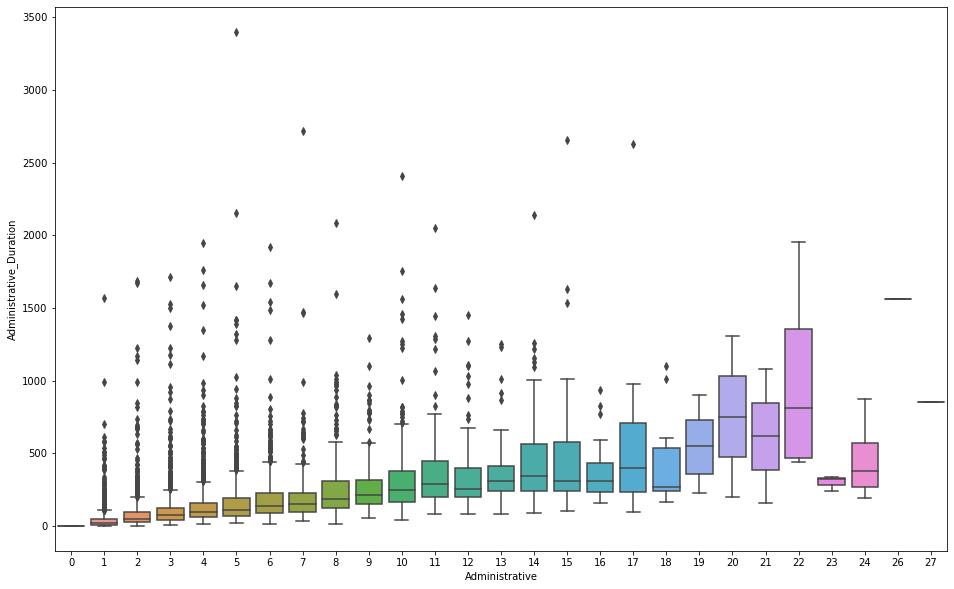

In [14]:
plt.figure(figsize=(16,10))
sns.boxplot(x="Administrative", y="Administrative_Duration", data=online_shoppers_df)
plt.show()

Do **Administrative** równego 20 widzimy w miarę regularny wzrost mediany i przesuwanie się boxów w górę.

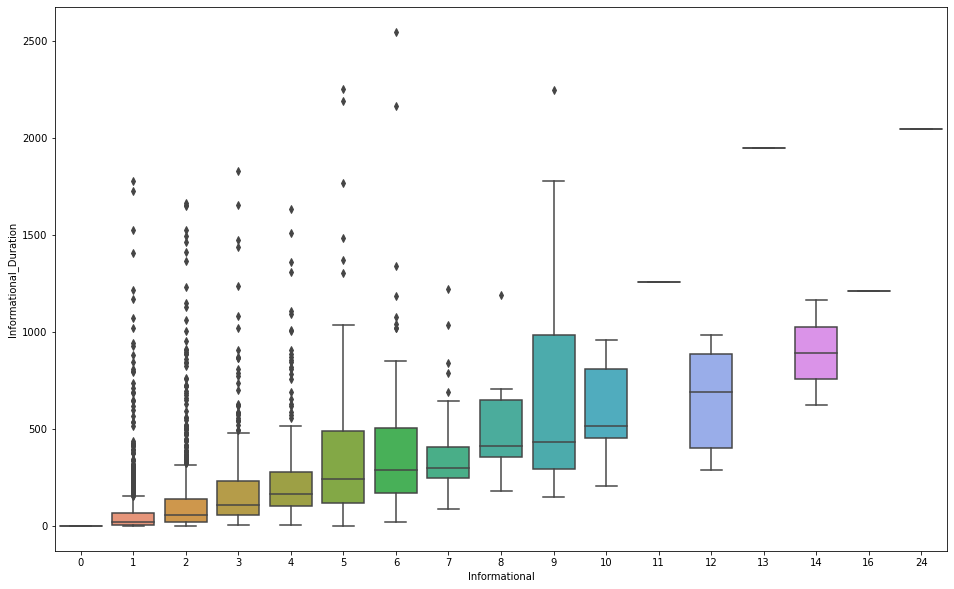

In [15]:
plt.figure(figsize=(16,10))
sns.boxplot(x="Informational", y="Informational_Duration", data=online_shoppers_df)
plt.show()

Do **Informational** równego 11 widzimy w miarę regularny wzrost mediany i przesuwanie się boxów w górę.

## Zależności między zmiennymi kategorycznymi i numerycznymi

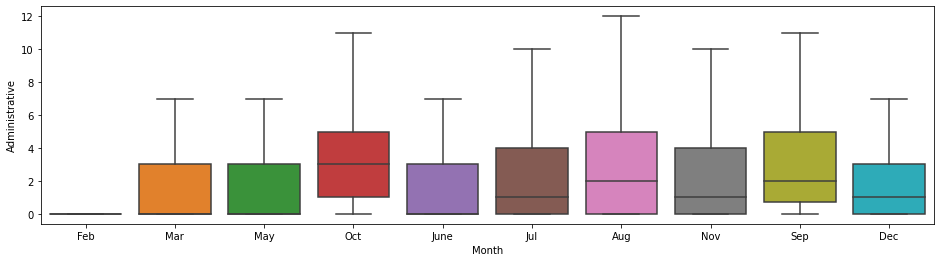

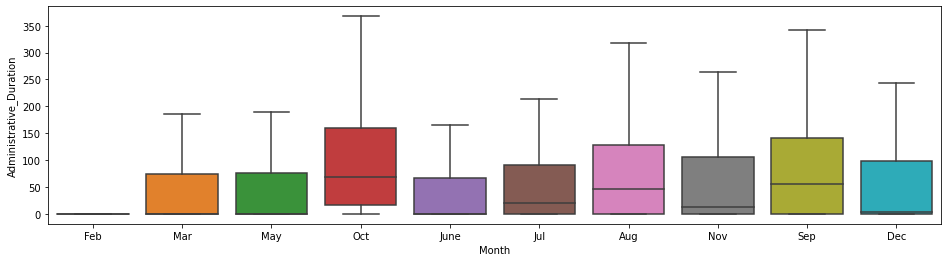

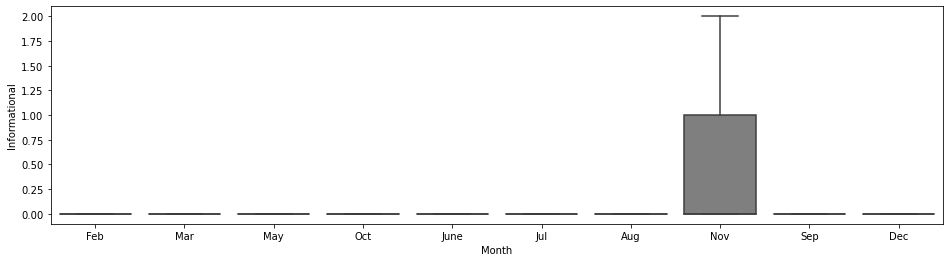

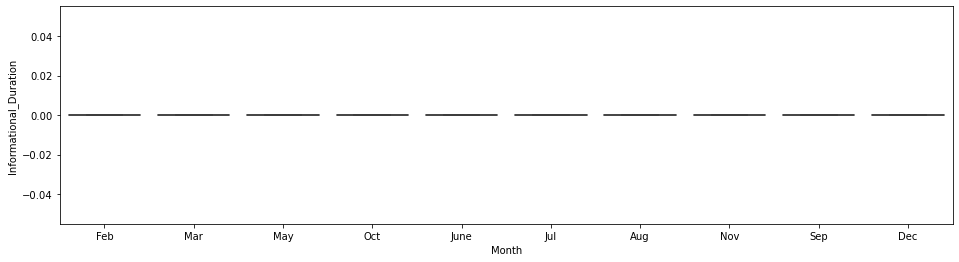

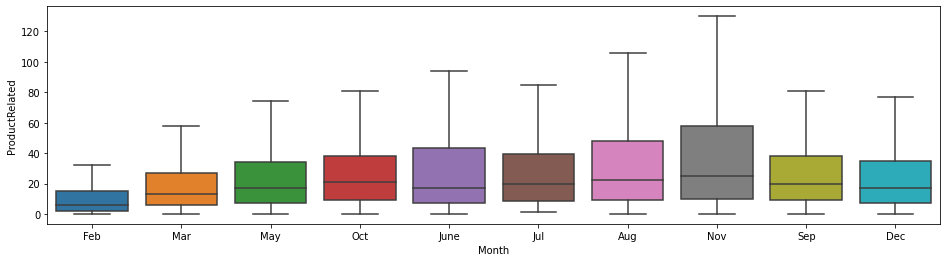

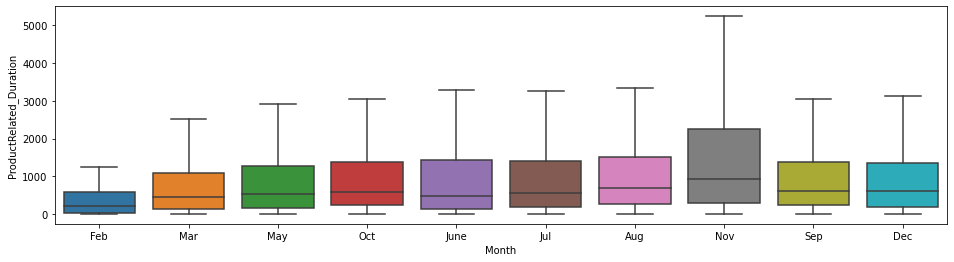

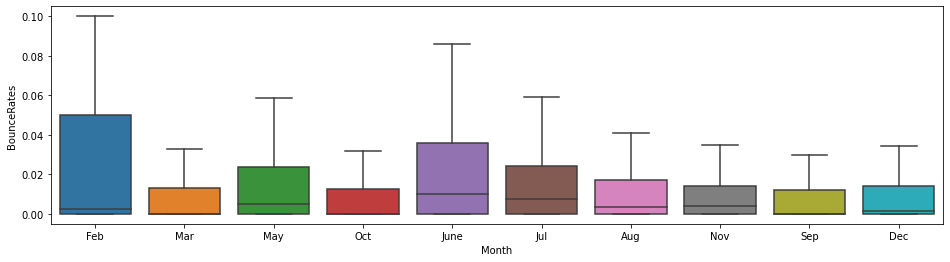

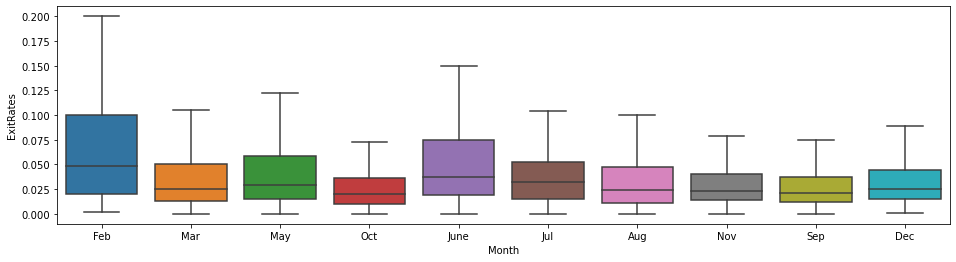

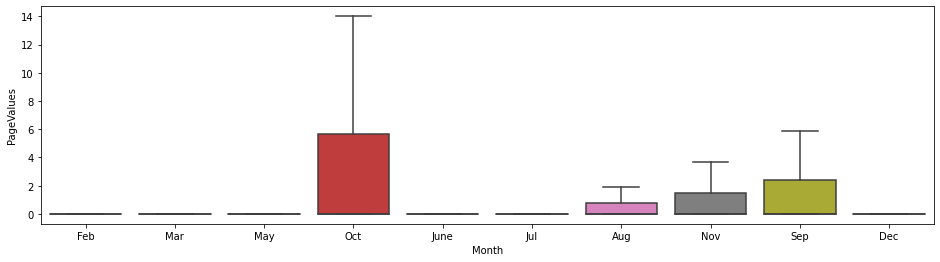

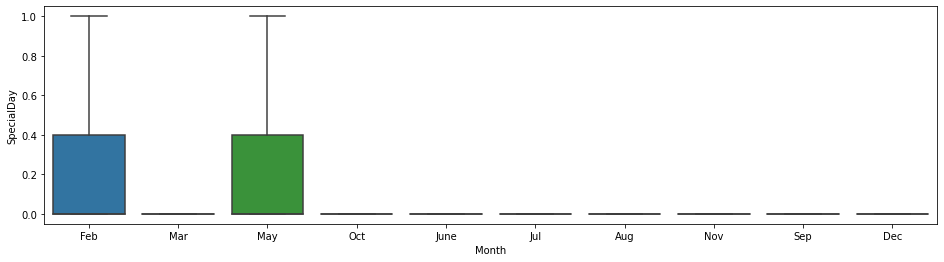

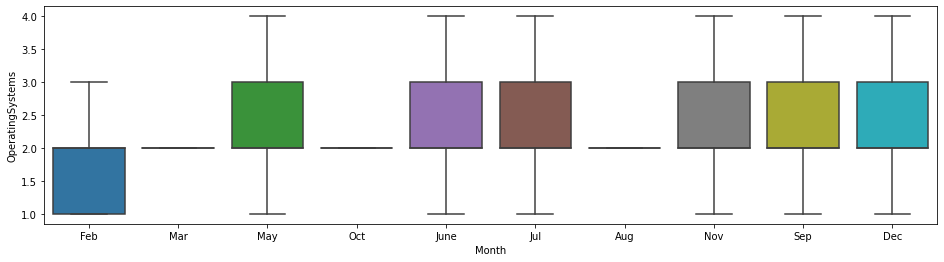

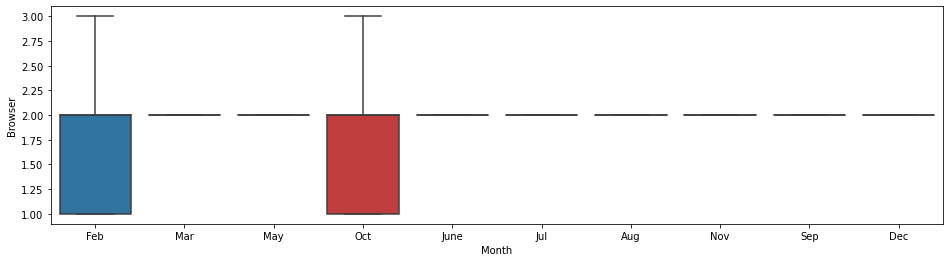

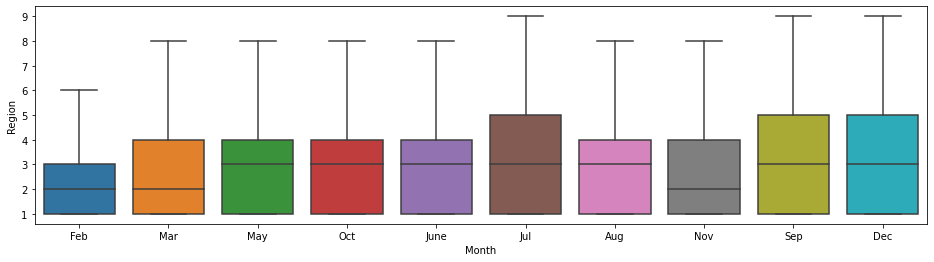

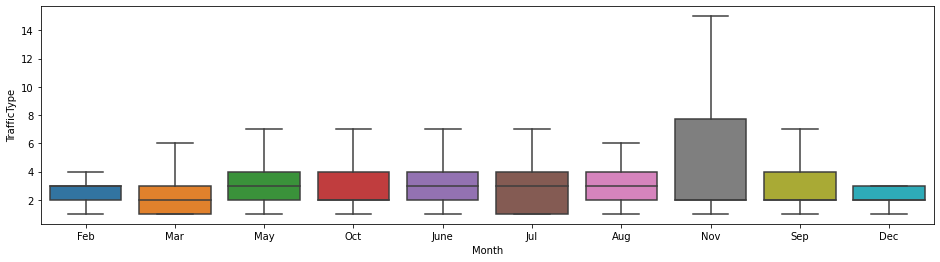

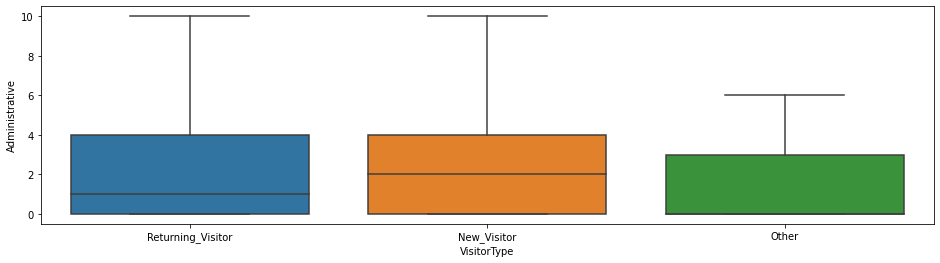

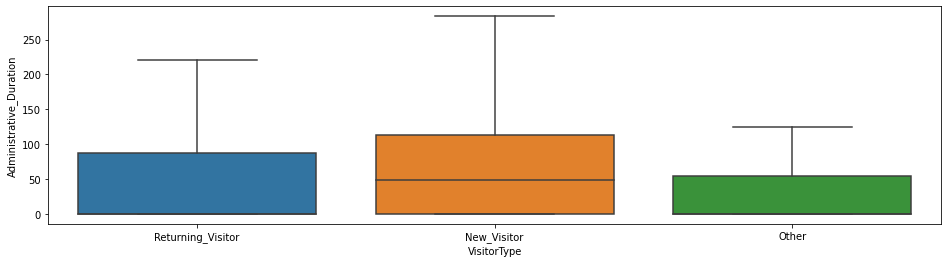

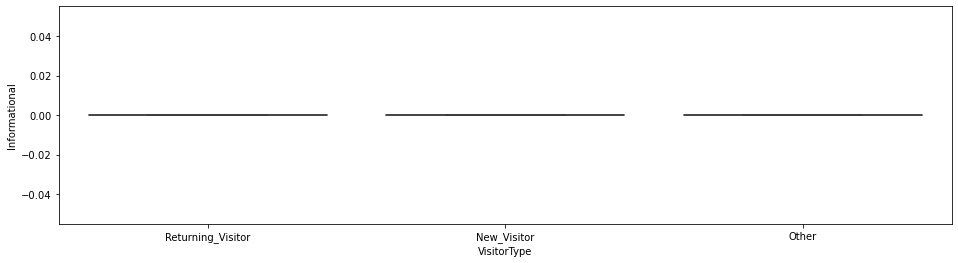

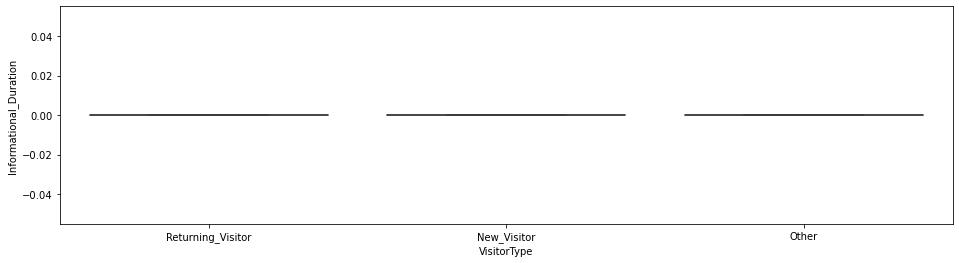

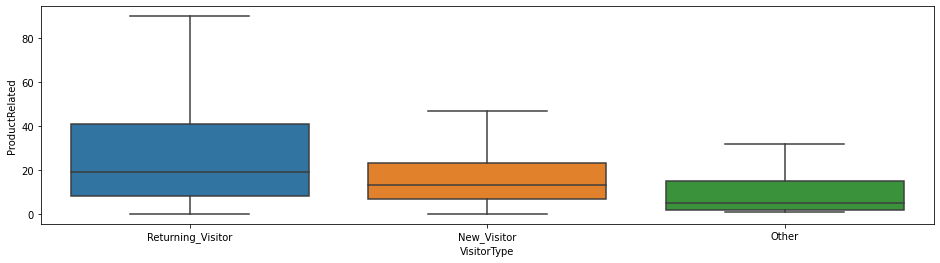

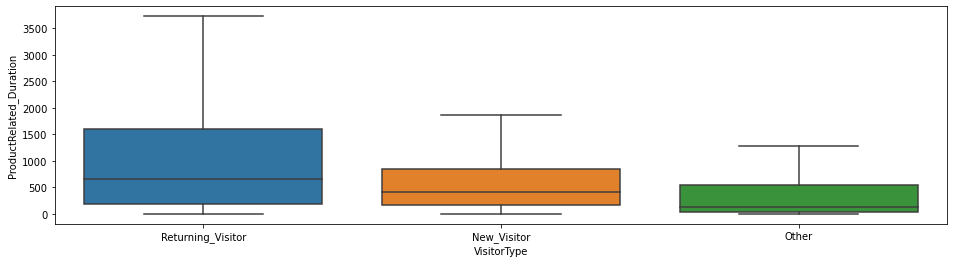

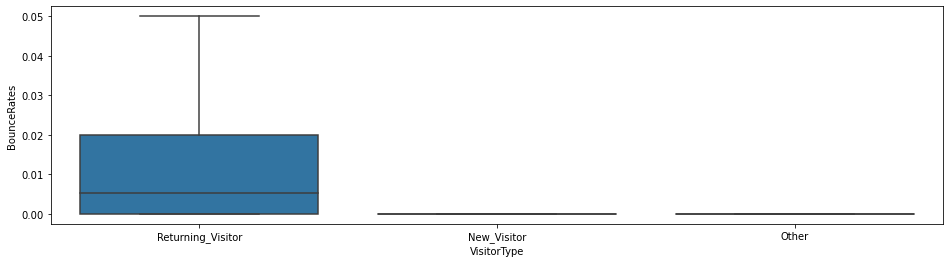

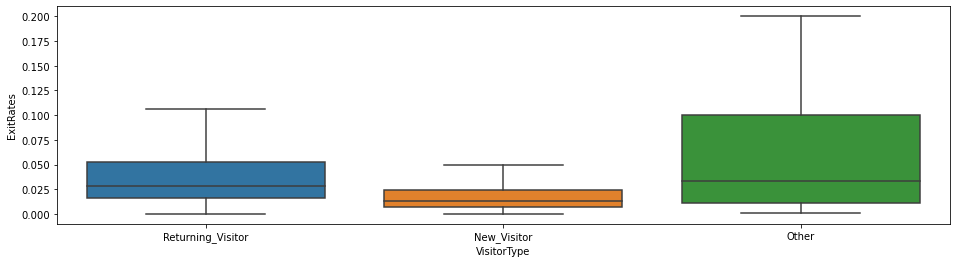

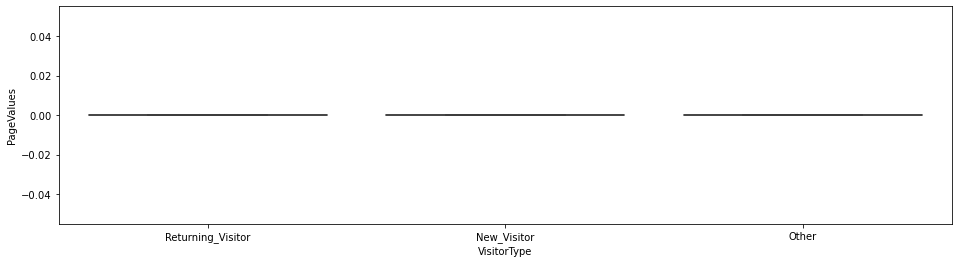

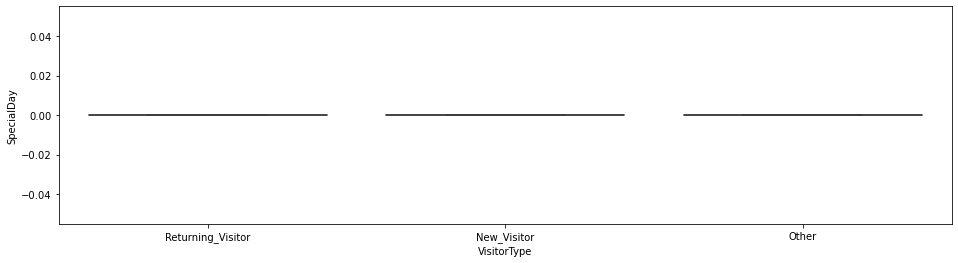

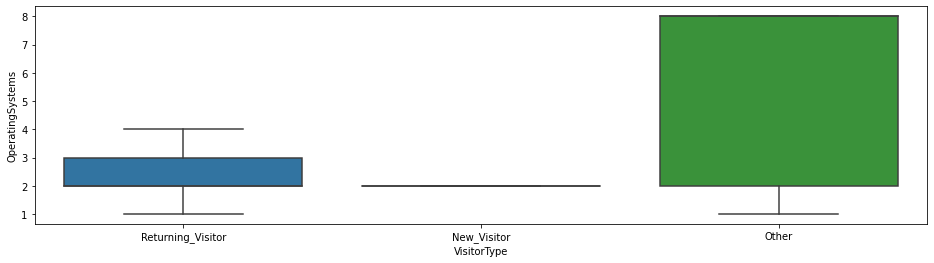

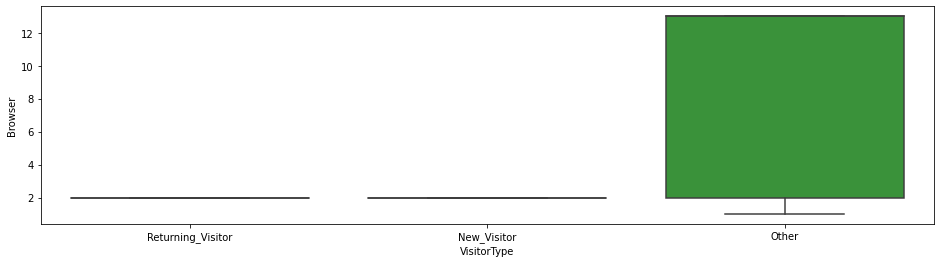

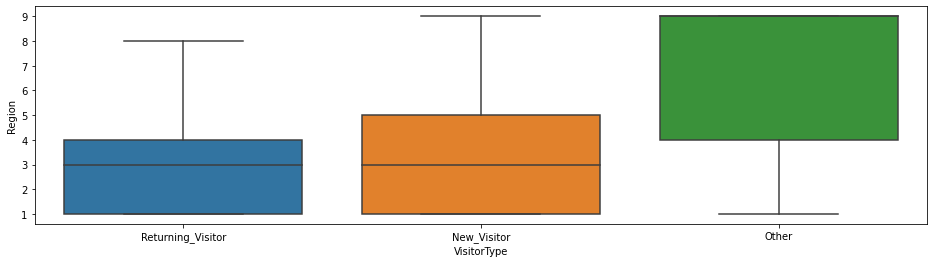

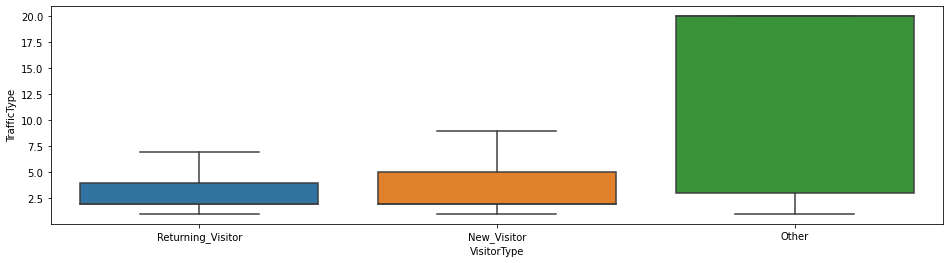

In [16]:
iter = list(range(0, 10))
iter = iter + list(range(11, 15))
for cat in online_shoppers_df.columns[[10, 15]]:
    for num in online_shoppers_df.columns[iter]:

        plt.figure(figsize=(16,4))
        sns.boxplot(x=cat, y=num, data=online_shoppers_df, showfliers = False)#.set(ylim=(0, 30))
        plt.show()

Ciekawsze zależności między zmiennymi kategorycznymi a numerycznymi:

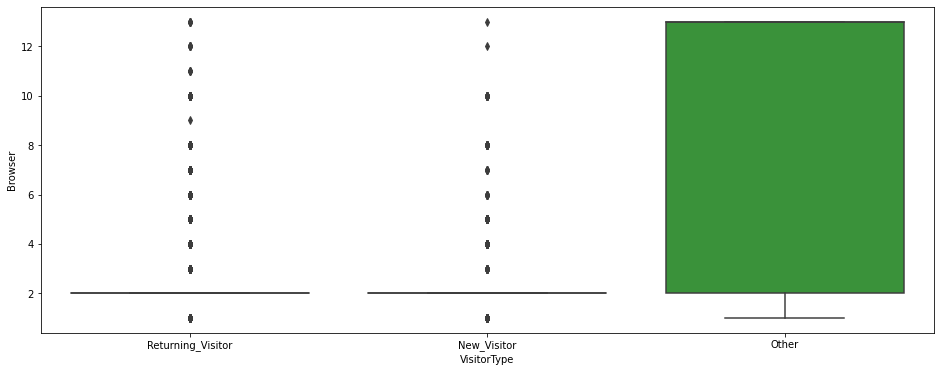

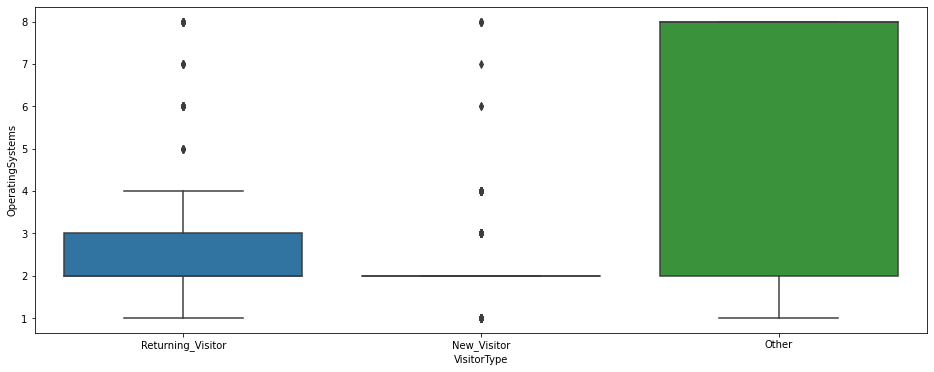

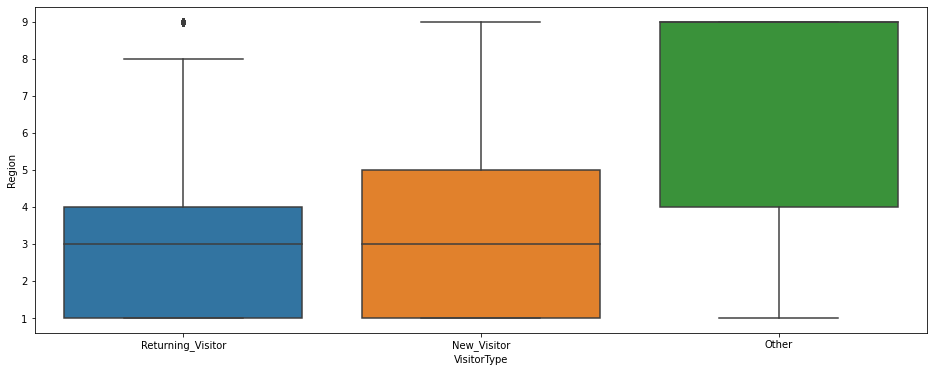

In [17]:
plt.figure(figsize=(16,6))
sns.boxplot(data=online_shoppers_df, x="VisitorType", y="Browser")
plt.show()
plt.figure(figsize=(16,6))
sns.boxplot(data=online_shoppers_df, x="VisitorType", y="OperatingSystems")
plt.show()
plt.figure(figsize=(16,6))
sns.boxplot(data=online_shoppers_df, x="VisitorType", y="Region")
plt.show()

*Other* jest może administratorem sieci, bo używa głównie innych przeglądarek, systemu operacyjnego i łączy się z tylko jednego regionu.

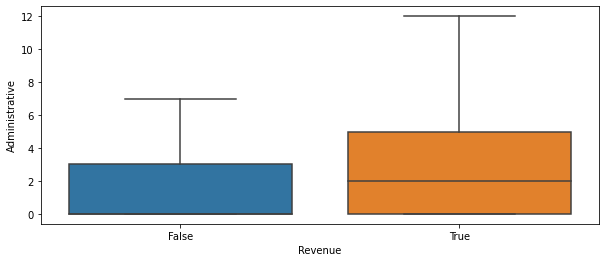

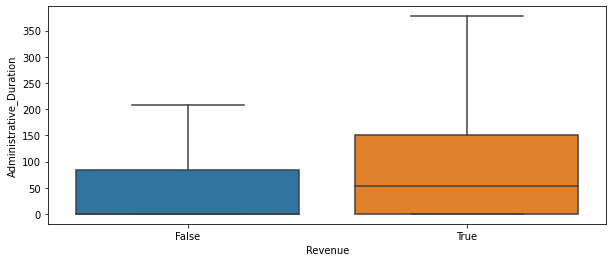

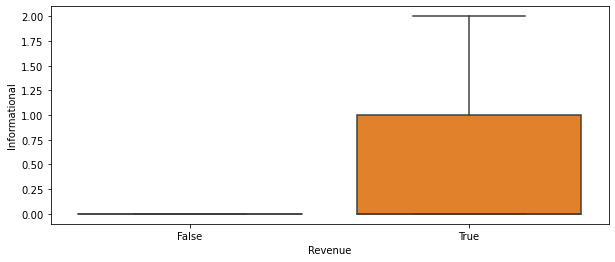

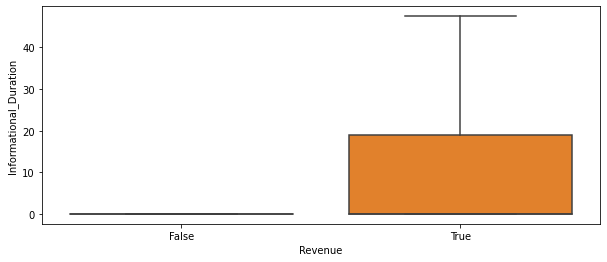

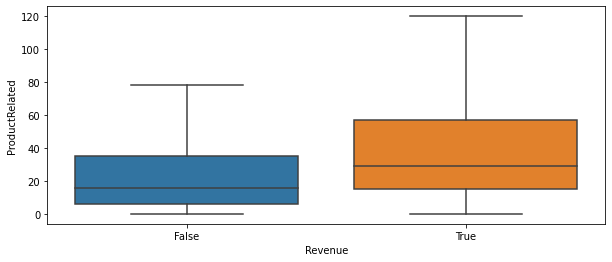

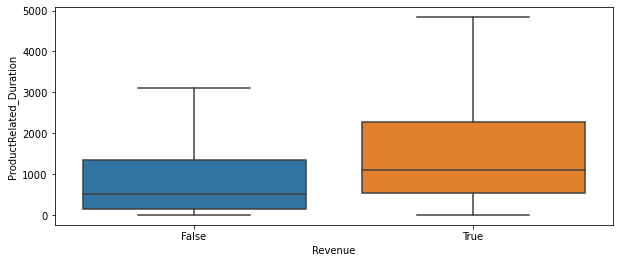

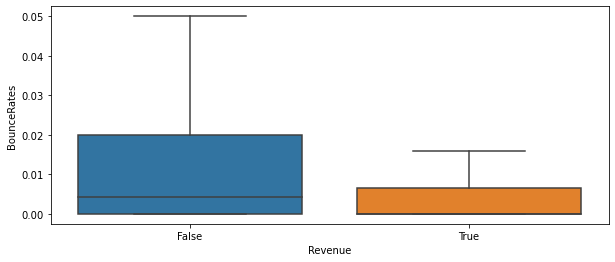

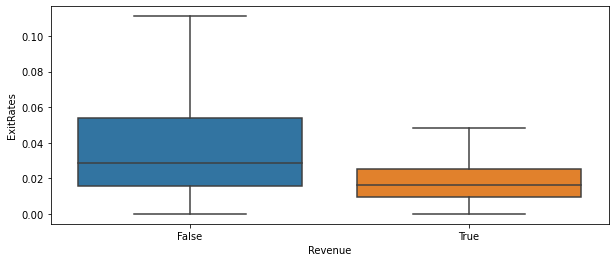

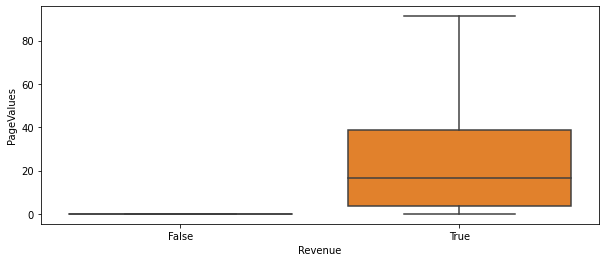

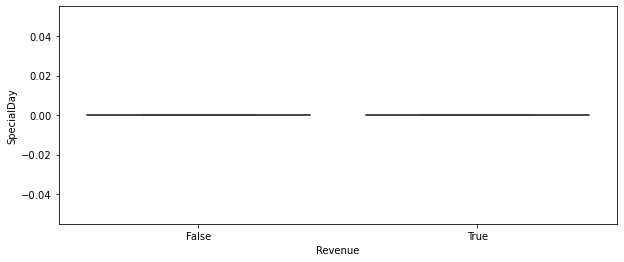

In [18]:
for num in online_shoppers_df.columns[0:10]:

        plt.figure(figsize=(10,4))
        sns.boxplot(x='Revenue',y=num, data=online_shoppers_df, showfliers = False)
        plt.show()

* Klienci z Revenue spędzają więcej czasu na stronie i są bardziej aktywni

## Podsumowanie

* Duża ilość obserwacji
* Nie ma braków danych
* Dużo wartości zerowych z rozkładami prowostronnie skośnymi
* Potrzebne skalowanie
* Niezbalansowane dane
* Korelacje:
    - Administrative_Duration ~ Administrative
    - Informational_Duration ~ Informational
    - ProductRelated_Duration ~ ProductRelated
    - ExitRates ~ BounceRates
    - Revenue ~ PageValues
* Znaczne zależności Revenue z zmiennymi numerycznymi